In [4]:
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
from tqdm import tqdm

import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('./reviews_all_parts_sampled_by_cat_and_limited_by_prods_09-01-2021.csv')

df_esp1 = df[df['country']!='MLB'].reset_index(drop=True)
df_por1 = df[df['country']=='MLB'].reset_index(drop=True)

df_esp2 = pd.read_csv('./reviews_esp_full.csv')
df_por2 = pd.read_csv('./reviews_por_full.csv')

assert df_esp1.equals(df_esp2)
assert df_por1.equals(df_por2)

MLB
MLA
MLM
MLU
MCO
MLC
MLV
MPE


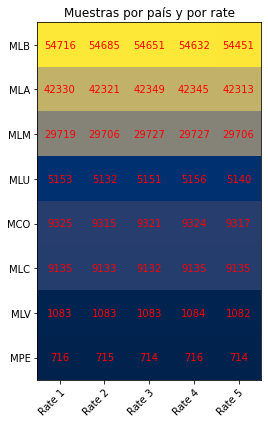

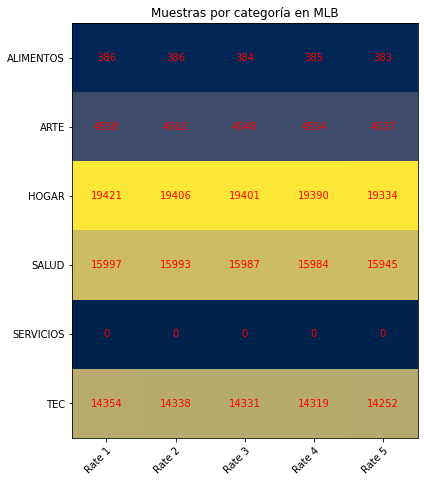

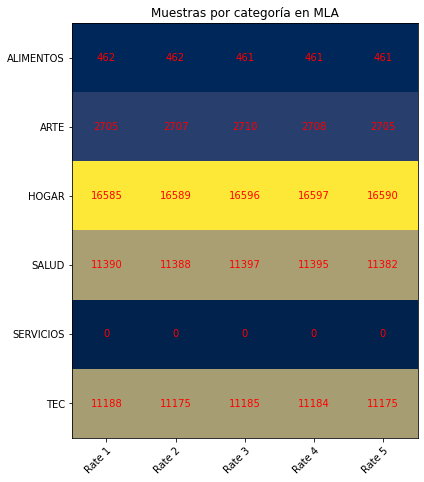

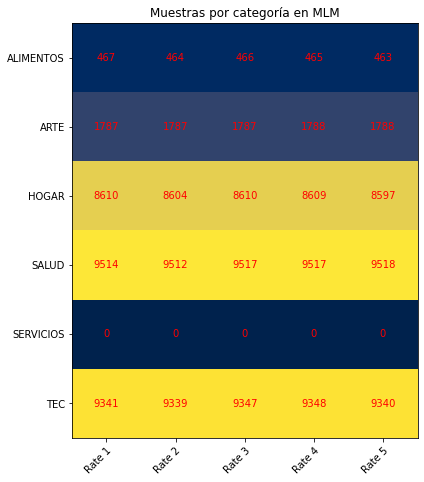

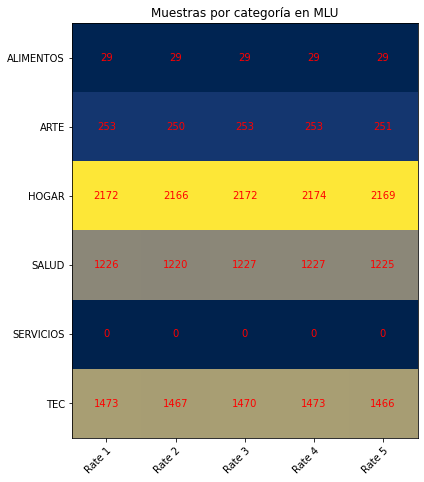

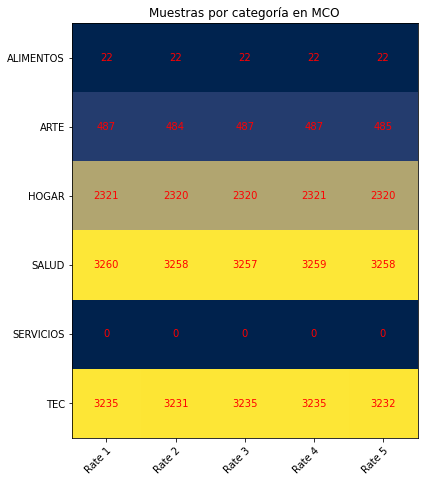

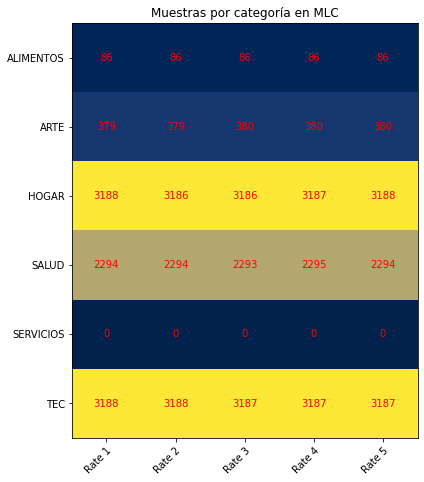

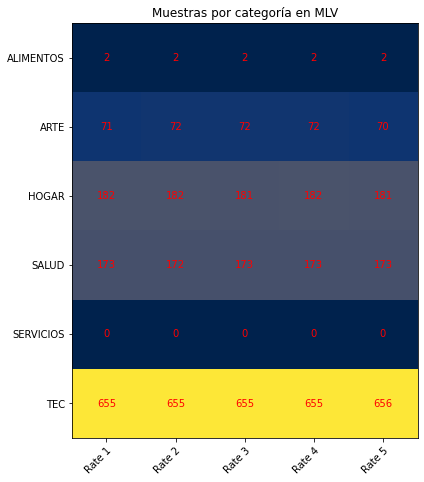

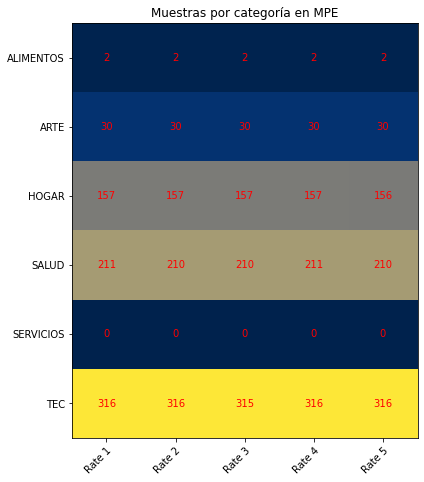

In [9]:
df_esp = pd.read_csv('reviews_esp_cleaned.csv')
df_por = pd.read_csv('reviews_por_cleaned.csv')

def plot_heatmap(matrix,countries,rates):

    fig, ax = plt.subplots(1,1,figsize=(len(countries),len(rates)+1))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(rates)))
    ax.set_yticks(np.arange(len(countries)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(['Rate {}'.format(s) for s in rates])
    ax.set_yticklabels(countries)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(countries)):
        for j in range(len(rates)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    ax.set_title("Muestras por país y por rate")
    fig.tight_layout()
    return fig, ax

df = pd.concat([df_esp,df_por],ignore_index=True)
countries = ['MLB','MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
matrix = np.zeros((len(countries),len(rates)),dtype=np.int)
for i,country in enumerate(countries):
    for j,rate in enumerate(rates):
        mymask = (df['review_rate'] == rate) & (df['country'] == country)
        matrix[i,j] = len(df[mymask])

fig, ax = plot_heatmap(matrix,countries,rates)
fig.show()


def plot_heatmap2(matrix,yticks,xticks,title):

    fig, ax = plt.subplots(1,1,figsize=(len(yticks),len(xticks)*2))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(xticks)))
    ax.set_yticks(np.arange(len(yticks)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(['Rate {}'.format(s) for s in xticks])
    ax.set_yticklabels(yticks)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(yticks)):
        for j in range(len(xticks)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    ax.set_title(title)
    fig.tight_layout()
    return fig, ax

abbreviations = {'Hogar / Casa': 'HOGAR',
'Tecnología y electrónica / Tecnologia e electronica': 'TEC',
'Arte y entretenimiento / Arte e Entretenimiento': 'ARTE',
'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal': 'SALUD',
'Alimentos y Bebidas / Alimentos e Bebidas': 'ALIMENTOS',
'Servicios / Serviços': 'SERVICIOS'}

categories = sorted(list(abbreviations.keys()))
abbs = [abbreviations[cat] for cat in categories]

for country in countries:
    print(country)
    matrix = np.zeros((len(categories),len(rates)),dtype=np.int)
    for i,category in enumerate(categories):
        for j,rate in enumerate(rates):
            mymask = (df['review_rate'] == rate) & (df['category'] == category) & (df['country'] == country)
            matrix[i,j] = mymask.sum()

    fig, ax = plot_heatmap2(matrix,abbs,rates,title='Muestras por categoría en {}'.format(country))
    fig.show()

In [44]:
df = pd.concat([df_esp,df_por],ignore_index=True)
countries = ['MLB','MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
matrix_countries = np.zeros((len(countries),len(rates)),dtype=np.int)
for i,country in enumerate(countries):
    for j,rate in enumerate(rates):
        mymask = (df['review_rate'] == rate) & (df['country'] == country)
        matrix_countries[i,j] = len(df[mymask])

abbreviations = {'Hogar / Casa': 'HOGAR',
'Tecnología y electrónica / Tecnologia e electronica': 'TEC',
'Arte y entretenimiento / Arte e Entretenimiento': 'ARTE',
'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal': 'SALUD',
'Alimentos y Bebidas / Alimentos e Bebidas': 'ALIMENTOS',
'Servicios / Serviços': 'SERVICIOS'}

categories = sorted(list(abbreviations.keys()))
abbs = [abbreviations[cat] for cat in categories]

matrix = {}
for country in countries:
    print(country)
    matrix[country] = np.zeros((len(categories),len(rates)),dtype=np.int)
    for i,category in enumerate(categories):
        for j,rate in enumerate(rates):
            mymask = (df['review_rate'] == rate) & (df['category'] == category) & (df['country'] == country)
            matrix[country][i,j] = mymask.sum()

    matrix[country] = matrix[country] - (matrix[country] - \
        matrix[country].min(axis=1,keepdims=True))

MLB
MLA
MLM
MLU
MCO
MLC
MLV
MPE


In [46]:
df['lens'] = df['review_content'].str.len()
df = df.sort_values(by=['lens'],ascending=False)

indices = []
for country in countries:
    print(country)
    for i, cat in enumerate(categories):
        for j,rate in enumerate(rates):
            indices.extend(df[(df['country'] == country) & (df['review_rate'] == rate) & (df['category'] == cat)].iloc[:matrix[country][i,j],:].index.tolist())

df = df.loc[indices,:]

MLB
MLA
MLM
MLU
MCO
MLC
MLV
MPE


MLB
MLA
MLM
MLU
MCO
MLC
MLV
MPE


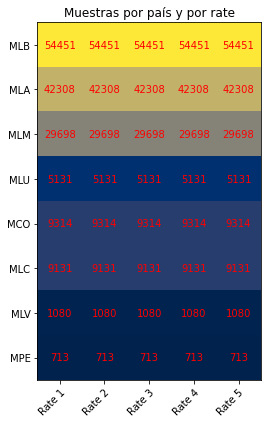

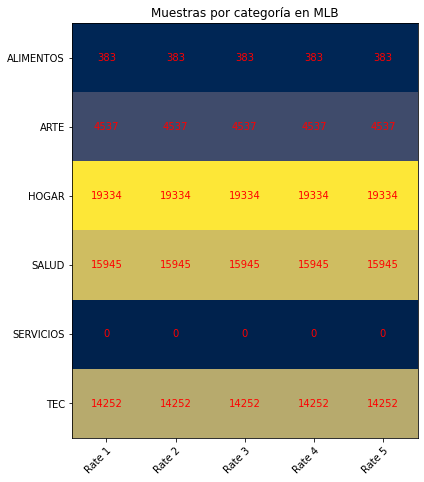

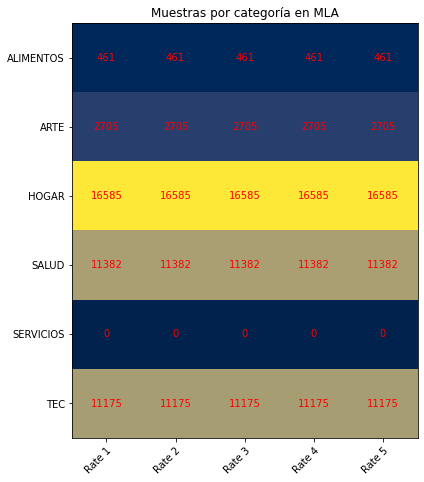

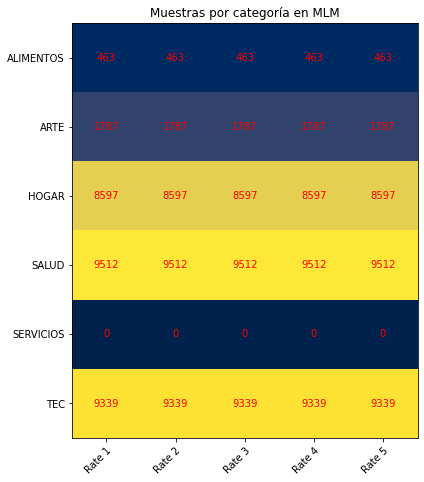

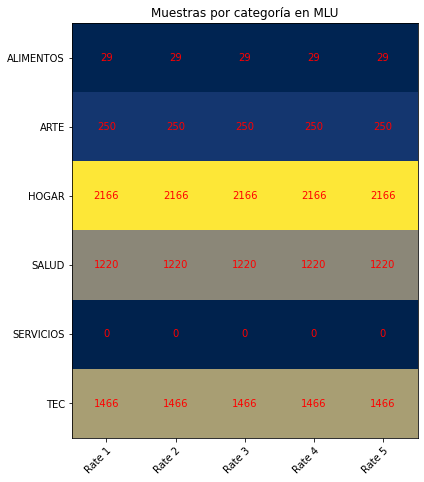

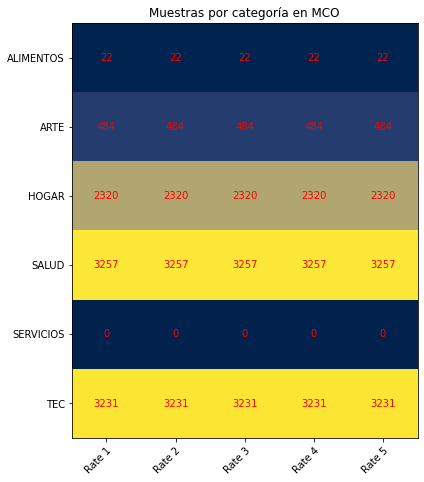

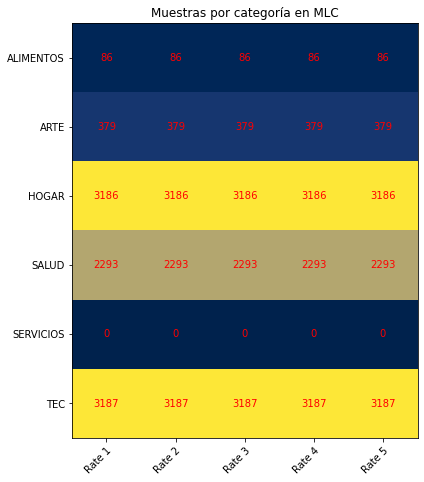

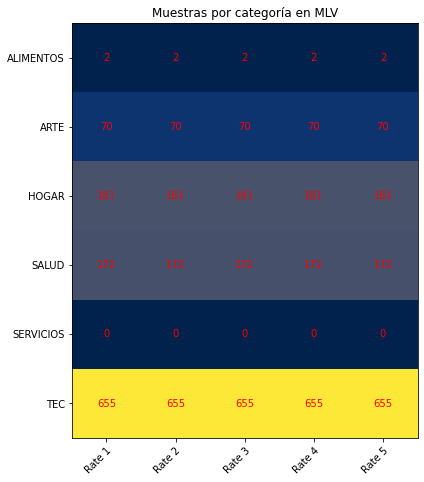

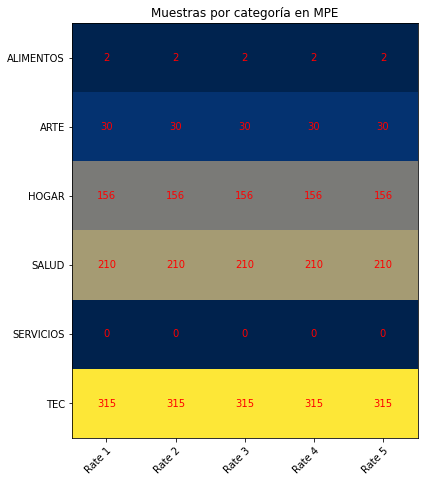

In [52]:
df_esp = pd.read_csv('./reviews_esp_cleaned.csv')
df_por = pd.read_csv('./reviews_por_cleaned.csv')
df = pd.concat([df_esp, df_por],ignore_index=True)

countries = ['MLB','MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]
matrix = np.zeros((len(countries),len(rates)),dtype=np.int)
for i,country in enumerate(countries):
    for j,rate in enumerate(rates):
        mymask = (df['review_rate'] == rate) & (df['country'] == country)
        matrix[i,j] = len(df[mymask])

fig, ax = plot_heatmap(matrix,countries,rates)
fig.show()

abbreviations = {'Hogar / Casa': 'HOGAR',
'Tecnología y electrónica / Tecnologia e electronica': 'TEC',
'Arte y entretenimiento / Arte e Entretenimiento': 'ARTE',
'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal': 'SALUD',
'Alimentos y Bebidas / Alimentos e Bebidas': 'ALIMENTOS',
'Servicios / Serviços': 'SERVICIOS'}

categories = sorted(list(abbreviations.keys()))
abbs = [abbreviations[cat] for cat in categories]

for country in countries:
    print(country)
    matrix = np.zeros((len(categories),len(rates)),dtype=np.int)
    for i,category in enumerate(categories):
        for j,rate in enumerate(rates):
            mymask = (df['review_rate'] == rate) & (df['category'] == category) & (df['country'] == country)
            matrix[i,j] = mymask.sum()

    fig, ax = plot_heatmap2(matrix,abbs,rates,title='Muestras por categoría en {}'.format(country))
    fig.show()